In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("submission.csv")

In [7]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [8]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [9]:
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [16]:
train.describe().round(1)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.0,1459.0,1457.0,1457.0,1450.0,1457.0,1457.0,1383.0,1369.0,1342.0,1459.0
mean,1105.9,11.5,16.7,0.0,2.5,52.2,1405.2,0.0,57.2,30.3,108.6
std,631.3,6.9,5.2,0.2,1.4,20.4,583.1,0.0,31.8,14.7,82.6
min,3.0,0.0,3.1,0.0,0.0,7.0,78.0,0.0,9.0,8.0,1.0
25%,555.5,5.5,12.8,0.0,1.4,36.0,879.0,0.0,36.0,20.0,37.0
50%,1115.0,11.0,16.6,0.0,2.3,51.0,1577.0,0.0,51.0,26.0,96.0
75%,1651.0,17.5,20.1,0.0,3.4,69.0,1994.0,0.1,69.0,37.0,150.0
max,2179.0,23.0,30.0,1.0,8.0,99.0,2000.0,0.1,269.0,90.0,431.0


In [18]:
test.describe().round(2)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,715.00,715.00,714.00,714.00,714.00,714.00,714.00,680.00,678.00,679.00
mean,1056.85,11.47,23.26,0.05,2.39,56.67,1359.49,0.04,36.93,24.94
std,625.57,6.93,4.04,0.22,1.17,19.66,614.17,0.02,12.64,10.08
min,0.00,0.00,14.60,0.00,0.00,16.00,126.00,0.00,9.00,7.00
25%,507.00,5.50,20.30,0.00,1.50,42.00,807.25,0.03,28.00,17.00
50%,1046.00,11.00,22.90,0.00,2.30,55.00,1489.00,0.04,35.00,24.00
75%,1616.50,17.00,26.37,0.00,3.27,73.75,2000.00,0.05,45.00,31.00
max,2177.00,23.00,33.80,1.00,5.90,100.00,2000.00,0.14,94.00,69.00


In [20]:
train.groupby('hour').mean()['count']

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

<AxesSubplot:xlabel='hour'>

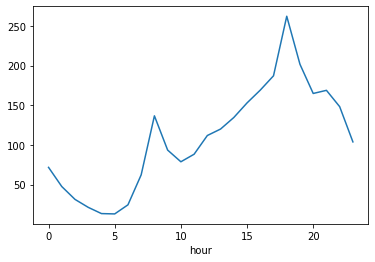

In [21]:
import seaborn as sns
train.groupby('hour').mean()['count'].plot()
sns.violinplot(data = train, x='hour',y='count')



In [28]:
import matplotlib.pyplot as plt

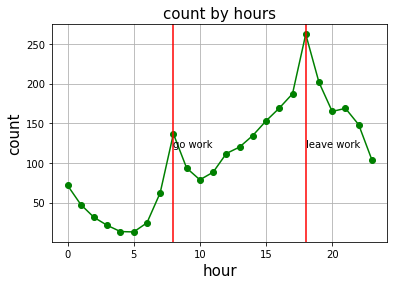

In [39]:
plt.plot(train.groupby('hour').mean()['count'], 'go-')
plt.grid()
plt.title('count by hours', fontsize=15)
plt.xlabel('hour', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.axvline(8, color = 'red')
plt.axvline(18, color = 'r')

plt.text(8,120, 'go work', fontsize=10)
plt.text(18,120, 'leave work', fontsize=10)

plt.savefig('picture.png')

<AxesSubplot:>

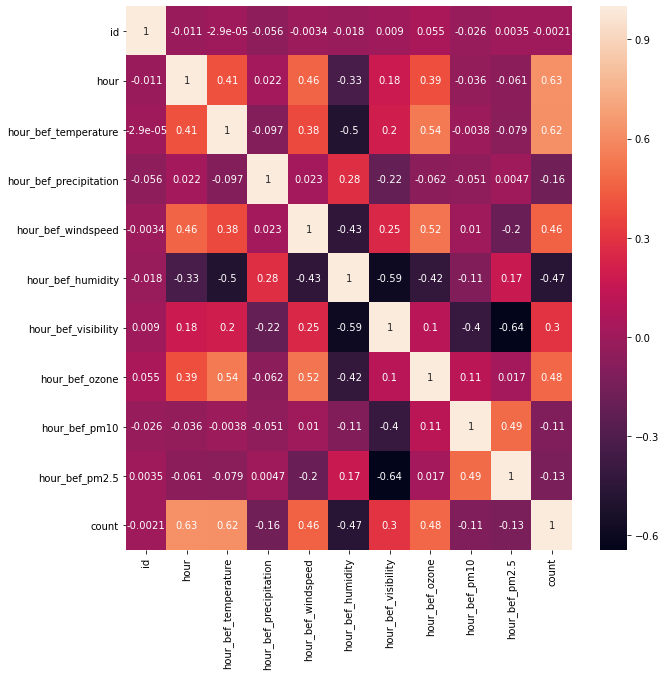

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot = True)

전처리

In [44]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [45]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [47]:
train[train['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


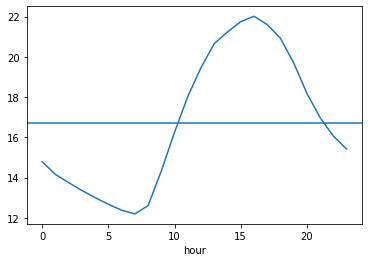

In [51]:
train.groupby('hour').mean()['hour_bef_temperature'].plot()
plt.axhline(train.groupby('hour').mean()['hour_bef_temperature'].mean())

In [53]:
train.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

In [54]:
train['hour_bef_temperature'].fillna({934:14.788136,1035:20.926667}, inplace = True)

In [56]:
train.loc[[934,1035],:]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [59]:
train[train['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


In [61]:
train[train['hour_bef_windspeed'].isna()].index

Int64Index([18, 244, 260, 376, 780, 934, 1035, 1138, 1229], dtype='int64')

In [67]:
train['hour_bef_windspeed'].fillna({18:3.28, 244:1.83, 260:1.62, 376:1.96, 780:3.27, 934:1.96, 1035:3.83, 1138:2.76, 1229:1.63}, inplace = True)

In [64]:
train.groupby('hour')['hour_bef_windspeed'].mean()

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [68]:
train[train['hour_bef_windspeed'].isna()].index

Int64Index([], dtype='int64')

In [69]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          0
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [70]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [71]:
test[test['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
test['hour_bef_temperature'].fillna({653:19.7}, inplace=True)

In [73]:
test[test['hour_bef_temperature'].isna()].index

Int64Index([], dtype='int64')

In [76]:
test[test['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5


In [75]:
test['hour_bef_windspeed'].fillna({653:3.59}, inplace=True)

###모델링

In [78]:
features = ['hour', 'hour_bef_temperature','hour_bef_windspeed']
X_train = train[features]
Y_train = train['count']
X_test = test[features]

In [81]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(1459, 3)
(1459,)
(715, 3)


In [83]:
model100 = RandomForestRegressor(n_estimators=100, random_state=0)
model100_5 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
model200 = RandomForestRegressor(n_estimators=200)


In [84]:
model100.fit(X_train, Y_train)
model100_5.fit(X_train, Y_train)
model200.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200)

In [85]:
ypred1 = model100.predict(X_test)
ypred2 = model100_5.predict(X_test)
ypred3 = model200.predict(X_test)

In [90]:
submission['count'] = ypred1
submission.to_csv('model100.csv', index=False)

In [88]:
submission['count'] = ypred2
submission

,id,count
0,0,91.921188
1,1,244.312542
2,2,120.491578
3,4,23.119400
4,5,142.363433
...,...,...
710,2148,53.684927
711,2149,53.744055
712,2165,109.092165
713,2166,198.022690


In [89]:
submission['count'] = ypred3
submission

,id,count
0,0,90.670
1,1,253.690
2,2,103.370
3,4,33.495
4,5,141.065
...,...,...
710,2148,67.255
711,2149,56.960
712,2165,124.915
713,2166,177.835


In [91]:
submission

,id,count
0,0,86.615000
1,1,245.590000
2,2,106.400000
3,4,32.740000
4,5,133.016667
...,...,...
710,2148,66.650000
711,2149,52.660000
712,2165,126.390000
713,2166,189.110000
